### 선형 회귀 모델
- Y = wx + b(선형 방정식) 로 x 와 y를 모델링합니다


In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = [10, 9, 3, 2]  #공부 시간
y = [90, 80, 50, 30] #점수 

#목표 : y = w * x + b 로 모델링해서 가장 최적(오차가 가장 작은) 의 w, b 값을 알아내기

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
x = np.array(x).reshape([-1, 1]) # 특징이 1개
model = LinearRegression().fit(x, y)
model.score(x, y) # 결정계수 

0.9573626373626374

In [5]:
model.coef_, model.intercept_  # 계수, 절편

(array([6.6]), 22.899999999999984)

In [32]:
h = model.coef_ * x + model.intercept_ # h(hyperthesis 예측)
h

array([88.9, 82.3, 42.7, 36.1])

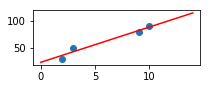

In [38]:
f

In [7]:
#h[:, 0] - y # 오차 
np.mean( (h[:, 0] - y) ** 2) # MSE: Mean Square Error 

24.250000000000014

이 작업을 전부 텐서플로 API 를 이용해 직접 구현합니다

In [1123]:
# 필요한 연산들을 정의
X = tf.placeholder(tf.float32, shape=[4])
Y = tf.placeholder(tf.float32, shape=[4])
w = tf.Variable(-10.0) #초기값, Variable 은 초기화가 필요합니다
b = tf.Variable(100.0)
h = w * X + b
cost = tf.reduce_mean((h - y) ** 2) #MSE
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # 최적화 해주는 방법으로 경사하강법
train = optimizer.minimize(cost)# 옵티마이저에게 cost 를 최소화하라고 시킵니다
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # global 모든, 전역 

In [1124]:
x = np.reshape(x, [-1])
y = np.array(y)
x.shape, y.shape

((4,), (4,))

445.62372 1.5972329 63.127396


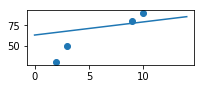

In [1137]:
for i in range(10):
    _, _h, _cost, _w, _b = sess.run([train, h, cost, w, b], {X:x, Y:y})
print(_cost, _w, _b)

import matplotlib.pyplot as plt
plt.figure(figsize=(3,1)) 
plt.scatter(x, y)
p = plt.plot(_w * np.arange(15) + _b)